In [1]:
# Automatically reload external modules
%load_ext autoreload
%autoreload 2

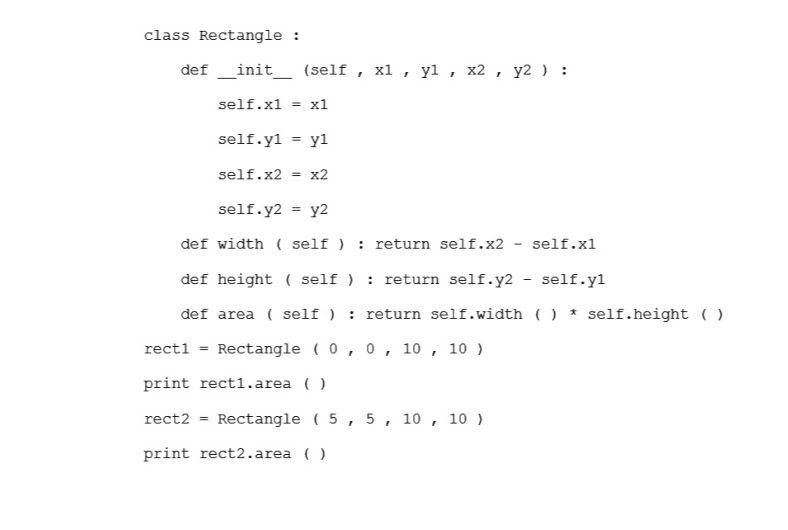

In [2]:
# just showing you the image of the text we will be using to generate fixations over

from IPython.display import Image

img = Image(filename='code_snippet.png')
img

In [17]:
import emip_toolkit as EMTK

image_path = "./"
image = "code_snippet.png"
aoi = EMTK.find_aoi(image, image_path, level="sub-line")
aoi.head()
print(aoi.size)


658


/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)
/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  aoi = aoi.append(dic, ignore_index=True)


In [18]:
# we add the actual word associated with each area of interest (AOI)

file_path = "./"

aois_with_tokens = EMTK.add_tokens_to_AOIs(file_path, "code_snippet.txt", aoi)
aois_with_tokens.head()

/Users/ghailanfadah/Desktop/Eye-Tracking-Correction/emip_toolkit.py:1262: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for location in aois_raw["name"].iteritems():


,kind,name,x,y,width,height,image,token
0,sub-line,line 1 part 1,142.5,27,50,20,code_snippet.png,class
1,sub-line,line 1 part 2,197.5,27,88,20,code_snippet.png,Rectangle
2,sub-line,line 1 part 3,292.5,27,9,20,code_snippet.png,:
3,sub-line,line 2 part 1,178.5,61,33,22,code_snippet.png,def
4,sub-line,line 2 part 2,214.5,61,81,22,code_snippet.png,__init__


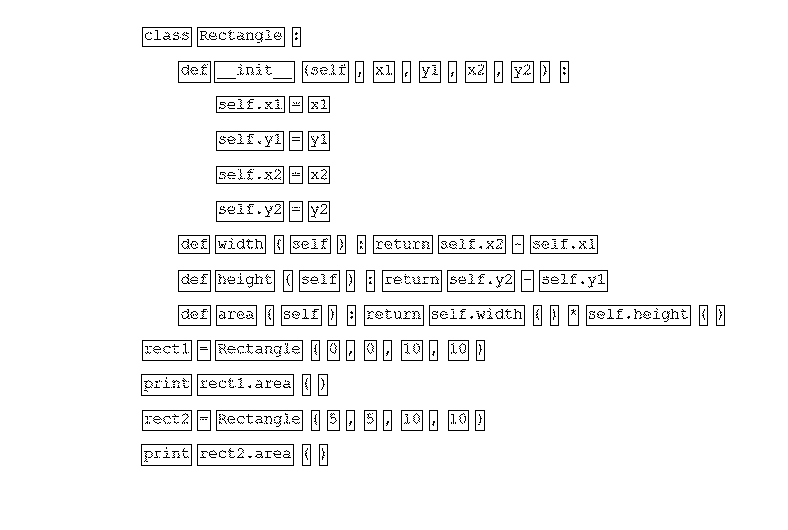

In [19]:
# finally, a visualization of the areas of interest (AOIs) around words!

EMTK.draw_aoi(aoi, image, image_path)

        kind             name      x    y width height             image  \
0   sub-line    line 1 part 1  142.5   27    50     20  code_snippet.png   
1   sub-line    line 1 part 2  197.5   27    88     20  code_snippet.png   
2   sub-line    line 1 part 3  292.5   27     9     20  code_snippet.png   
3   sub-line    line 2 part 1  178.5   61    33     22  code_snippet.png   
4   sub-line    line 2 part 2  214.5   61    81     22  code_snippet.png   
..       ...              ...    ...  ...   ...    ...               ...   
89  sub-line  line 12 part 12  475.5  410    10     21  code_snippet.png   
90  sub-line   line 13 part 1  141.5  444    51     22  code_snippet.png   
91  sub-line   line 13 part 2  197.5  444    97     22  code_snippet.png   
92  sub-line   line 13 part 3  302.5  444     9     22  code_snippet.png   
93  sub-line   line 13 part 4  319.5  444     9     22  code_snippet.png   

         token  
0        class  
1    Rectangle  
2            :  
3          def  
4 

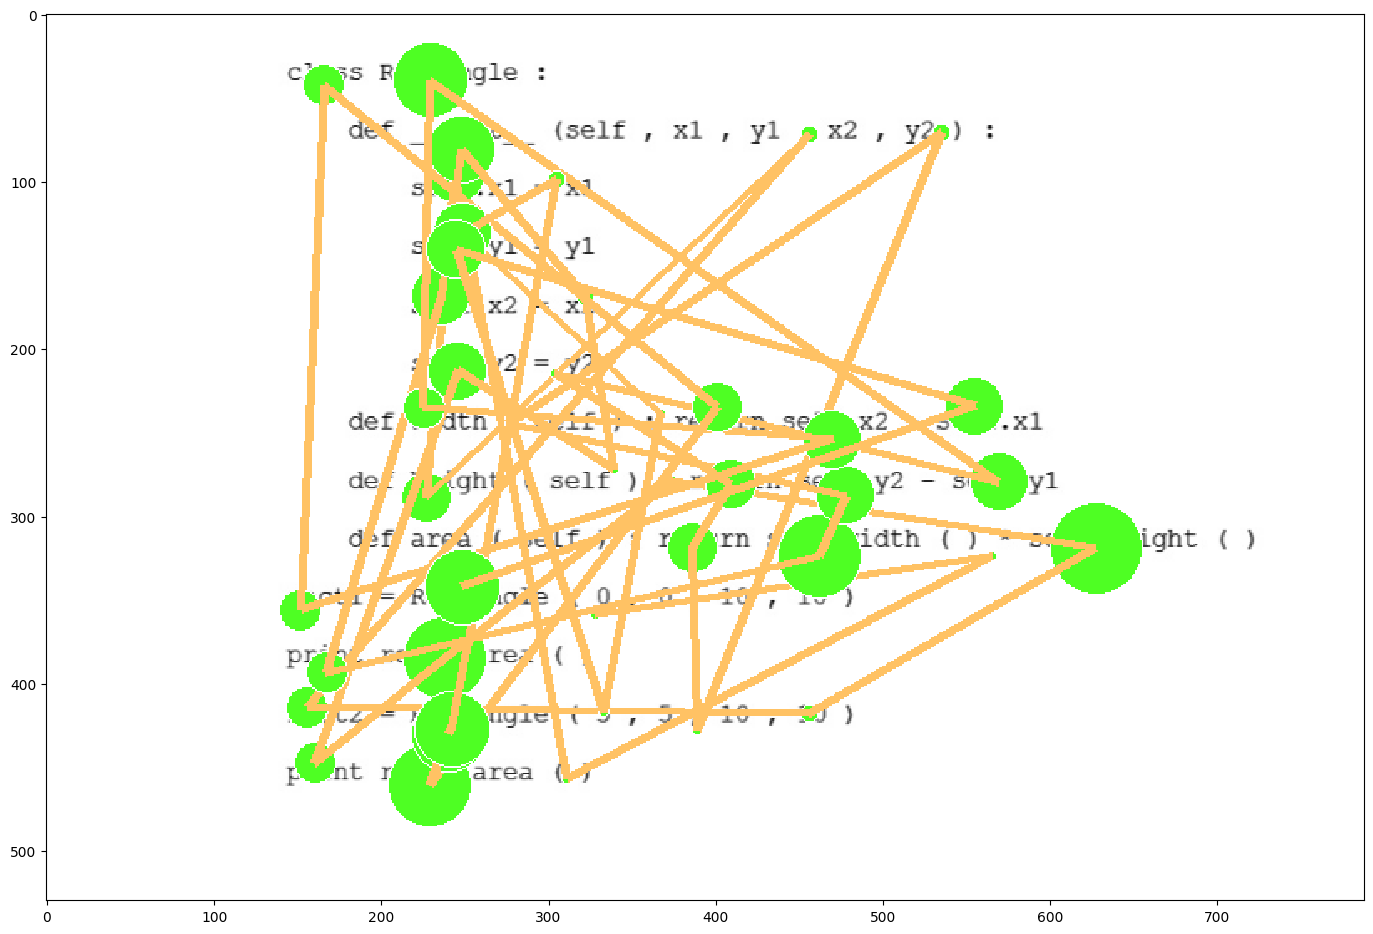

In [27]:
# this is the file you will work on a lot this project

import correction

# generating a synthetic trial
synth_fixations = correction.generate_fixations_code(aois_with_tokens)

# drawing the synthetic data!
correction.draw_fixation('code_snippet.png', synth_fixations)